<a href="https://colab.research.google.com/github/astrrr/Image-Processing-Lab/blob/main/Activity4_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4.1 VGG16 MODEL PARAMETERS

# Read image

In [5]:
img = cv2.imread('/content/drive/MyDrive/dataset/Images_of_Waste/train/Glass/Glass16.jpg')
img = cv2.resize(img, (224, 224))

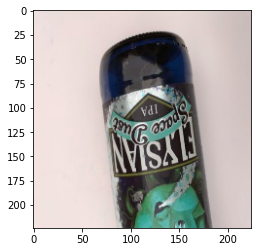

In [6]:
plt.imshow(img)
plt.show()

# Load VGG16

In [7]:
model = VGG16()

# Model detail 

In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Retrieve kernel weights from the 1st Convolutional layer

In [9]:
kernels, biases = model.layers[1].get_weights()

In [10]:
kernels

array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

# View CNN layer 1 architecture

In [11]:
model.layers[1].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 64,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block1_conv1',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

# Preprocess Image using keras and numpy


*   convert the image to an array




In [12]:
img = img_to_array(img)



*   Expand dimensions so that it represents a single 'sample’ -> reshape 3D(H,W,Ch) image to 4D image (sample,H,W,Ch)




In [13]:
img.shape

(224, 224, 3)

In [14]:
img = expand_dims(img, axis=0)

In [15]:
img.shape

(1, 224, 224, 3)



*   Prepare the image (e.g. scale pixel values for the vgg)




In [16]:
img

array([[[[241., 228., 226.],
         [240., 227., 225.],
         [239., 226., 224.],
         ...,
         [202., 189., 187.],
         [202., 189., 187.],
         [202., 189., 187.]],

        [[240., 227., 225.],
         [240., 227., 225.],
         [239., 226., 224.],
         ...,
         [202., 189., 187.],
         [202., 189., 187.],
         [202., 189., 187.]],

        [[240., 227., 225.],
         [239., 226., 224.],
         [238., 225., 223.],
         ...,
         [202., 189., 187.],
         [202., 189., 187.],
         [202., 189., 187.]],

        ...,

        [[247., 232., 230.],
         [246., 231., 229.],
         [245., 230., 228.],
         ...,
         [221., 207., 208.],
         [222., 208., 209.],
         [223., 209., 210.]],

        [[247., 232., 230.],
         [247., 232., 230.],
         [246., 231., 229.],
         ...,
         [221., 207., 208.],
         [222., 208., 209.],
         [223., 209., 210.]],

        [[248., 233., 231.],
       

In [17]:
img_ready = preprocess_input(img)

In [18]:
img_ready

array([[[[122.061, 111.221, 117.32 ],
         [121.061, 110.221, 116.32 ],
         [120.061, 109.221, 115.32 ],
         ...,
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ]],

        [[121.061, 110.221, 116.32 ],
         [121.061, 110.221, 116.32 ],
         [120.061, 109.221, 115.32 ],
         ...,
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ]],

        [[121.061, 110.221, 116.32 ],
         [120.061, 109.221, 115.32 ],
         [119.061, 108.221, 114.32 ],
         ...,
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ],
         [ 83.061,  72.221,  78.32 ]],

        ...,

        [[126.061, 115.221, 123.32 ],
         [125.061, 114.221, 122.32 ],
         [124.061, 113.221, 121.32 ],
         ...,
         [104.061,  90.221,  97.32 ],
         [105.061,  91.221,  98.32 ],
         [106.061,  92.221,  99.32 ]],

        [[

# Extract Model CNN Layer 1

In [19]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


# Extract Results from CNN Layer 1 called feature map (shape = (sample = 1, 224, 224, n_filters) )



*   CNN Layer 1 -> n_filters = 64



In [27]:
feature_maps = model.predict(img_ready)

In [28]:
feature_maps.shape

(1, 224, 224, 64)

# Display images of feature_maps

In [21]:
result = np.array(feature_maps[:,:,:])


In [22]:
result.shape

(1, 224, 224, 64)

In [23]:
result.shape

(1, 224, 224, 64)

In [24]:
result = np.squeeze(result, axis=0)

In [37]:
def displayFilter(feature_map):
  plt.figure(figsize=(224,224))
  for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_map[0,:,:,i], cmap='jet')
    plt.axis('on')
  plt.show()

In [38]:
displayFilter(feature_maps)

# 4.2 IMAGE PREPARATION (FROM SCRATCH)